#**Build, Train & Test your Neural Network**

In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [81]:
# Load the dataset
df = pd.read_csv('train.csv')

# Encode all categorical features using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
y = df['Survived']

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
NN_model = tf.keras.Sequential([
  tf.keras.Input(shape=(4,)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# Train the model
train_history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model on the test set
loss, accuracy, precision, recall = NN_model.evaluate(X_test, y_test, verbose=0)

# Print loss and accuracy
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.2%}')

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4102 - loss: 0.7481 - precision: 0.3654 - recall: 0.8099
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5235 - loss: 0.6878 - precision: 0.4208 - recall: 0.6359
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7219 - loss: 0.6458 - precision: 0.7045 - recall: 0.4422
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6696 - loss: 0.6335 - precision: 0.6547 - recall: 0.2439
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6871 - loss: 0.6061 - precision: 0.6620 - recall: 0.2648
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6403 - loss: 0.6019 - precision: 0.6154 - recall: 0.1914
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6478 - loss: 0.5918 - precision: 0.6006 - recall: 0.1749
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6317 - loss: 0.5806 - precision: 0.4509 - recall: 0.1374
Epoch 9/100
23/23 ━━━━━━

#**Plot Metrics**

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [84]:
# Print a parameters table
NN_model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

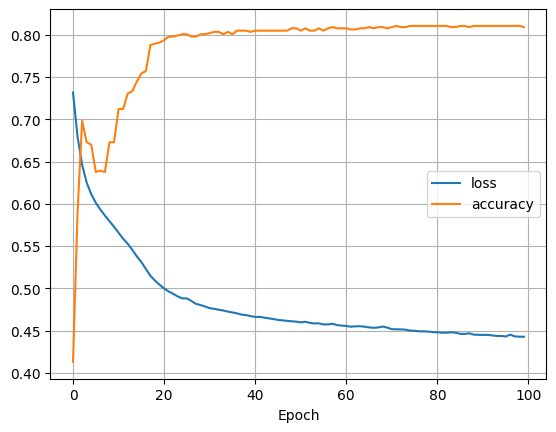

In [85]:
# Plot a loss & accuracy against epoch graph
def plot_graph(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid(True)
  plt.show

plot_graph(train_history)

In [89]:
# Compute F1-score of model
f1 = 2 * (precision * recall) / (precision + recall + 1e-7)

# Print precision, recall and F1-score of model
print('{:<25} {:>10} {:>10} {:>10}'.format('Model', 'Precision', 'Recall', 'F1-Score'))
print('-' * 60)
print('{:<25} {:>10.4f} {:>10.4f} {:>10.4f}'.format('Neural Network', precision, recall, f1))

Model                      Precision     Recall   F1-Score
------------------------------------------------------------
Neural Network                0.7846     0.6892     0.7338


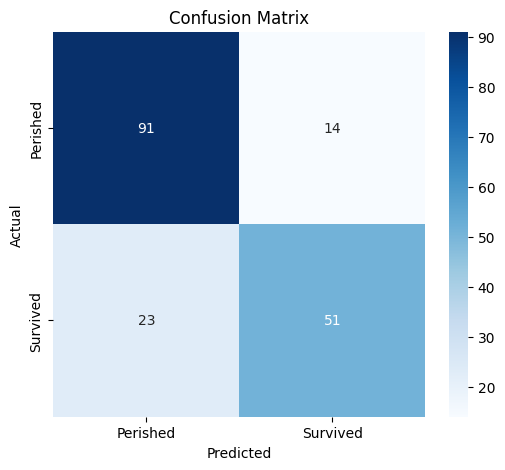

In [87]:
# Make predictions on the test set
y_proba = NN_model.predict(X_test, verbose=0)
y_pred = (y_proba >= 0.5).astype(int).ravel()

# Confusion Matrix of model
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Perished', 'Survived'], yticklabels=['Perished', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**Apply the Model**

In [88]:
# Load dataset for predictions
df_pred = pd.read_csv('test.csv')
X_pred = df_pred.drop(columns=['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

# Encode all categorical features using LabelEncoder
label_encoders = {}
for col in X_pred.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_pred[col] = le.fit_transform(X_pred[col])
    label_encoders[col] = le

# Make predictions on the dataset
y_prob = NN_model.predict(X_pred, verbose=0)
y_pred = (y_prob >= 0.5).astype(int).ravel()

# Get the passenger names
passenger_names = df_pred['Name']

# Combine the passenger names and the predictions
predictions = zip(passenger_names, y_pred)

# Print predictions
print('Predictions:')
for name, pred in predictions:
  name = name.split(',')
  firstname, surname = name[1].lstrip(), name[0]
  status = 'survived' if pred == 1 else 'perished'
  print(f'{firstname} {surname} {status}.')

Predictions:
Mr. James Kelly perished.
Mrs. James (Ellen Needs) Wilkes survived.
Mr. Thomas Francis Myles perished.
Mr. Albert Wirz perished.
Mrs. Alexander (Helga E Lindqvist) Hirvonen survived.
Mr. Johan Cervin Svensson perished.
Miss. Kate Connolly survived.
Mr. Albert Francis Caldwell perished.
Mrs. Joseph (Sophie Halaut Easu) Abrahim survived.
Mr. John Samuel Davies perished.
Mr. Ylio Ilieff perished.
Mr. Charles Cresson Jones perished.
Mrs. John Pillsbury (Nelle Stevenson) Snyder survived.
Mr. Benjamin Howard perished.
Mrs. Herbert Fuller (Carrie Constance Toogood) Chaffee survived.
Mrs. Sebastiano (Argenia Genovesi) del Carlo survived.
Mr. Daniel Keane perished.
Mr. Gerios Assaf perished.
Miss. Ida Livija Ilmakangas survived.
Mrs. Mariana (Miriam")" Assaf Khalil survived.
Mr. Martin Rothschild perished.
Master. Artur Karl Olsen perished.
Mrs. Alfred (Antoinette) Flegenheim survived.
Mr. Richard Norris II Williams perished.
Mrs. Arthur Larned (Emily Maria Borie) Ryerson survived.